In [54]:
# 데이터 전처리
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split

In [55]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [56]:
# np.column_stack = 전달받은 리스트를 일렬로 세운 뒤 차례대로 연결
np.column_stack(([1, 2, 3], [4, 5, 6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [57]:
# 길이, 무게의 np_array로 데이터 만들기
fish_data = np.column_stack((fish_length, fish_weight))

In [58]:
# np.zeros, np.ones = 파라미터로 입력받은 수만큼 0 또는 1로 채움
print(np.ones(5))
print(np.zeros(5))

[1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


In [59]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [60]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42) # 디폴드 값은 train : test = 75 : 25

In [61]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [62]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42, stratify=fish_target) # 디폴드 값은 train : test = 75 : 25

In [63]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [64]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [65]:
# 이상이 있는 새로운 샘플에 대한 예측
kn.predict([[25, 150]])

array([0.])

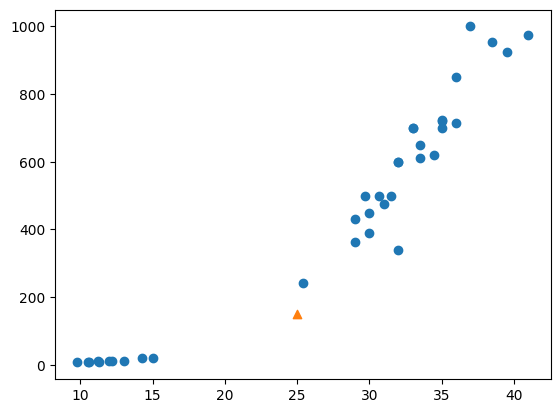

In [66]:
# 25, 150 샘플의 2차원 평면내의 위치 시각화
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.show()

In [67]:
# 임의의 샘플의 주변값 확인
distance, indexes = kn.kneighbors([[25, 150]])

In [68]:
distance, indexes

(array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
         138.39320793]]),
 array([[21, 33, 19, 30,  1]], dtype=int64))

In [69]:
train_input[indexes]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

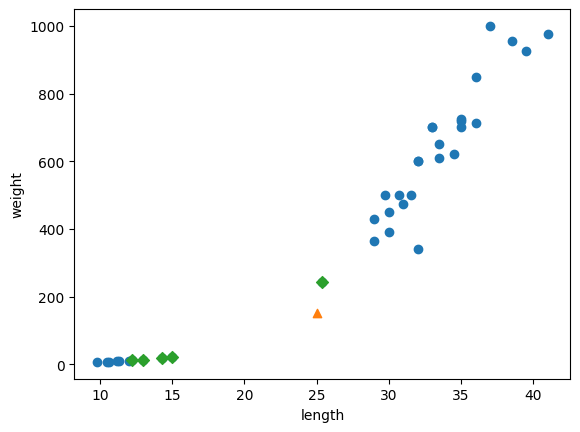

In [70]:
# 근접값에 대한 시각화
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

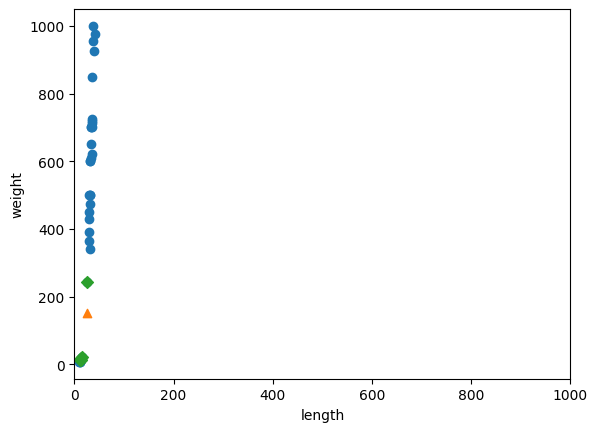

In [71]:
# 근접값에 대한 시각화
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.xlim((0, 1000))
plt.show()

### 모든 분류 모델, 회귀 모델이 거리기반 알고리즘이 아니기 때문에
### 알고리즘에 따라, 전처리 하여야 함(트리기반은 스케일이 달라도 상관없음)

In [72]:
train_input

array([[  29.7,  500. ],
       [  12.2,   12.2],
       [  33. ,  700. ],
       [  11.3,    8.7],
       [  39.5,  925. ],
       [  29. ,  430. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  31. ,  475. ],
       [  35. ,  720. ],
       [  37. , 1000. ],
       [  11.2,    9.8],
       [  34.5,  620. ],
       [  12. ,    9.8],
       [  29. ,  363. ],
       [  33. ,  700. ],
       [  30.7,  500. ],
       [  38.5,  955. ],
       [  33.5,  650. ],
       [  14.3,   19.7],
       [  31.5,  500. ],
       [  25.4,  242. ],
       [   9.8,    6.7],
       [  32. ,  600. ],
       [  10.5,    7.5],
       [  33.5,  610. ],
       [  10.6,    7. ],
       [  35. ,  700. ],
       [  32. ,  600. ],
       [  35. ,  725. ],
       [  13. ,   12.2],
       [  30. ,  450. ],
       [  32. ,  340. ],
       [  15. ,   19.9],
       [  30. ,  390. ],
       [  41. ,  975. ]])

In [73]:
# 학습데이터의 길이 평균, 무게 평균 = mean, 길이 편차와 무게 편차 = std
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

In [74]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [75]:
# 표준점수 설정(z-score: ((샘플의 값 - 평균) / 편차)
train_scaled = (train_input - mean) / std
print(train_scaled)

[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.17057727 -0.28177396]
 [ 0.5712808   0.76060496]
 [ 0.34087627  0.14198246]
 [ 1.12224816  1.54934866]
 [ 0.62136874  0.60594934]
 [-1.30200822 -1.34363949]
 [ 0.42101698  0.14198246]
 [-0.19005591 -0.65604058]
 [-1.75279969 -1.38384995]
 [ 0.47110492  0.45129371]
 [-1.68267658 -1.38137546]
 [ 0.62136874  0.48222484]
 [-1.67265899 -1.38292202]
 [ 0.77163257  0.76060496]
 [ 0.47110492  0.45129371]
 [ 0.77163257  0.83793278]
 [-1.43223687 -1.36683783]
 [ 0.27075315 -0.01267317]
 [ 0.47110492 -0.35291555]
 [-1.2318851  -1.34302087]
 [ 0.27075315 -0.19825992]
 [ 1.37268787  1.61121091]]


### 전처리 데이터로 모델 훈련하기

In [76]:
# 예측 샘플도 표준화하여야 함
new = ([25, 150] - mean) / std

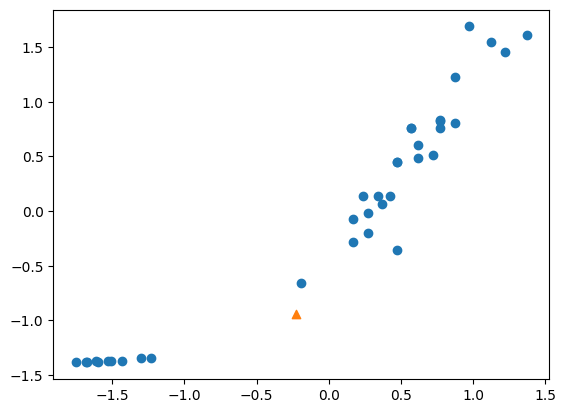

In [77]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.show()

In [78]:
# 모델 훈련
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [79]:
##### 매우중요! 훈련셋을 전처리했으면, 테스트셋도 그 전처리를 적용하여야 함
# test data를 z-score로 바꿀때 train data와 같은 mean과 std를 사용하여야 함
test_scaled = (test_input - mean) / std

In [80]:
# 정확도 평가
kn.score(test_scaled, test_target)

1.0

In [81]:
# 새로운 데이터 예측
kn.predict([new])

array([1.])

In [82]:
# 새로운 도미 데이터와 이웃한 벡터의 거리값과 인덱스
distance, indexes = kn.kneighbors([new])

In [83]:
distance, indexes

(array([[0.2873737 , 0.7711188 , 0.89552179, 0.91493515, 0.95427626]]),
 array([[21, 14, 34, 32,  5]], dtype=int64))

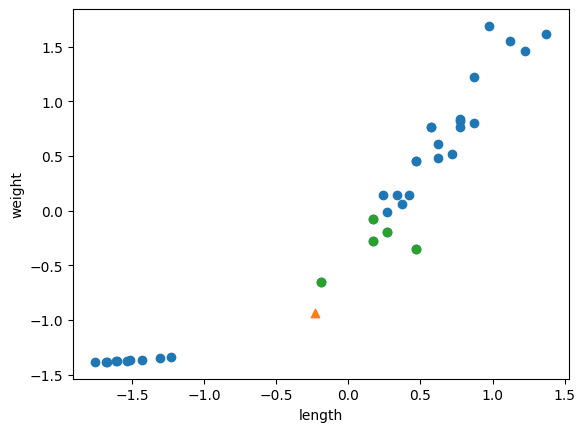

In [84]:
# 시각화
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()